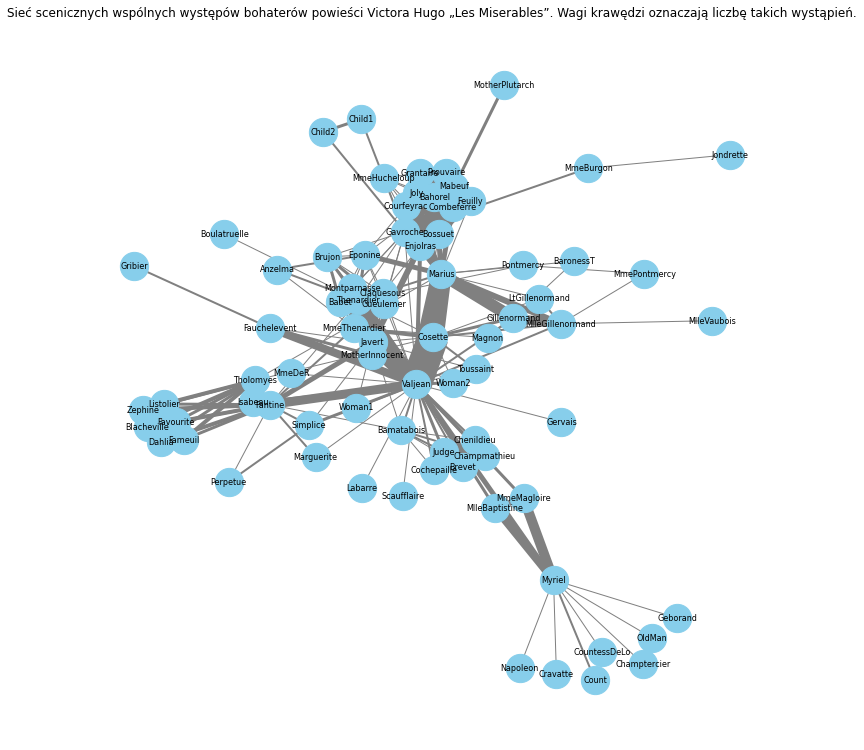

In [6]:
import networkx as nx
import matplotlib.pyplot as plt
import re

file_path = "C:\\Users\\macie\Desktop\\STUDIA\\SEMESTR3\\Techniki Wizualizacji Danych\\Prace Domowe\\Praca Domowa grafy\\lesmis\\lesmis.gml"
with open(file_path, 'r') as file:
    data = file.read()

nodes_match = re.findall(r'node\s*\[\s*id\s*(\d+)\s*label\s*"([^"]+)"\s*\]', data)
edges_match = re.findall(r'edge\s*\[\s*source\s*(\d+)\s*target\s*(\d+)\s*value\s*(\d+)\s*\]', data)

G = nx.Graph()

for node_id, label in nodes_match:
    G.add_node(int(node_id), label=label)

for source, target, value in edges_match:
    G.add_edge(int(source), int(target), value=int(value))

plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G)  
nx.draw(G, pos, with_labels=False, font_size=8, font_color='black', node_size=800, node_color='skyblue', edge_color='gray', width=[e[2]['value'] for e in G.edges(data=True)], edge_cmap=plt.cm.Blues)

node_labels = nx.get_node_attributes(G, 'label')
nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=8)
plt.title("Sieć scenicznych wspólnych występów bohaterów powieści Victora Hugo „Les Miserables”. Wagi krawędzi oznaczają liczbę takich wystąpień.")
plt.show()